## U.S. Medical Insurance project

This is my jupyter notebook for the project that will go alongside the python code, just to play around with both formats.

First I will import the relevant modules that I want to use.

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

Read the data in:

In [4]:
insurance = pd.read_csv("insurance.csv")
print(insurance.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


First I will do some tables, to use groupby and pivot table, to revise all that, then some graphs to use matplotlib and seaborn and revise all that. Maybe come to some conclusions in the meantime!

In [18]:
print(len(insurance))

1338


In [27]:
print(insurance.region.unique())
print(insurance.region.nunique())

['southwest' 'southeast' 'northwest' 'northeast']
4


In [8]:
print(insurance.charges.mean())

13270.422265141257


In [25]:
print(insurance.groupby("sex").charges.nunique().reset_index())

      sex  charges
0  female      662
1    male      675


In [14]:
print("The minimum age is {min_age} and the maximum age is {max_age}".
      format(min_age = insurance.age.min(), max_age = insurance.age.max()))

The minimum age is 18 and the maximum age is 64


In [16]:
print(insurance.groupby("sex").bmi.mean())

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64


In [17]:
print(insurance.groupby("region").charges.mean())

region
northeast    13406.384516
northwest    12417.575374
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64


Nothing really that interesting, I will look at some graphs now.

First looking at side by side bar charts for the difference between charges between men and women between different regions.

In [26]:
def create_x(t, w, n, d):
    return [(t * x) + (w * n) for x in range(d)]

In [51]:
insurance_subtable = insurance.groupby(['sex', 'region']).charges.mean().reset_index()
female = insurance_subtable.charges[insurance_subtable.sex == 'female'].reset_index(drop = True)
male = insurance_subtable.charges[insurance_subtable.sex == 'male'].reset_index(drop = True)
regions = insurance_subtable.region.unique()
female_x = create_x(2, 0.8, 1, len(regions))
male_x = create_x(2, 0.8, 2, len(regions))
middle_x = [(a + b) / 2.0 for a, b in zip(female_x, male_x)]

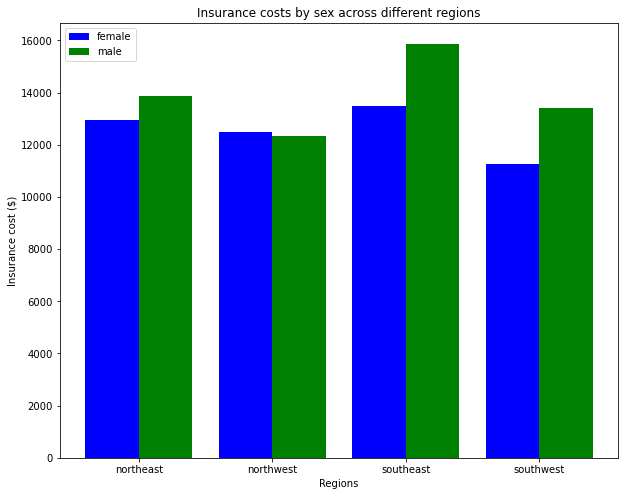

<Figure size 432x288 with 0 Axes>

In [85]:
plt.figure(figsize = (10, 8))
ax = plt.subplot()
ax.set_xticks(middle_x)
ax.set_xticklabels(regions)
plt.bar(female_x, female, color = "blue")
plt.bar(male_x, male, color = "green")
plt.legend(insurance_subtable.sex.unique(), loc = 2)
plt.xlabel("Regions")
plt.ylabel("Insurance cost ($)")
plt.title("Insurance costs by sex across different regions")
plt.show()
plt.savefig("insurance_by_sex_region_plt.png")

Next I will look at the relationship between age and BMI...

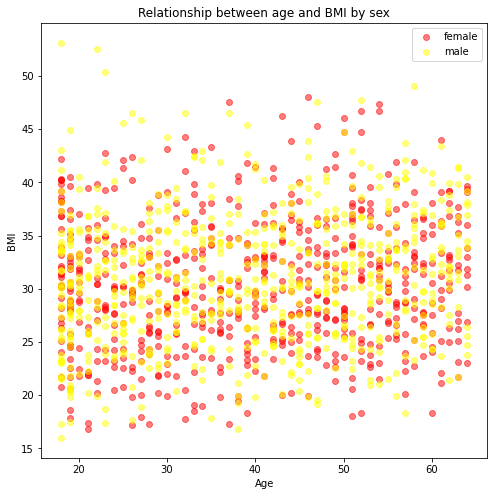

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize = (8, 8))
age_bmi_f = insurance[insurance.sex == 'female'].reset_index(drop = True)
age_bmi_m = insurance[insurance.sex == 'male'].reset_index(drop = True)
plt.scatter(age_bmi_f.age, age_bmi_f.bmi, alpha = 0.5, color = 'red')
plt.scatter(age_bmi_m.age, age_bmi_m.bmi, alpha = 0.5, color = 'yellow')
plt.legend(insurance.sex.unique())
plt.xlabel("Age")
plt.ylabel("BMI")
plt.title("Relationship between age and BMI by sex")
plt.show()
plt.savefig("insurance_age_bmi_plt.png")

Now looking at using seaborn: violin plot of the distribution of charges for smokers and non smokers for male and female.

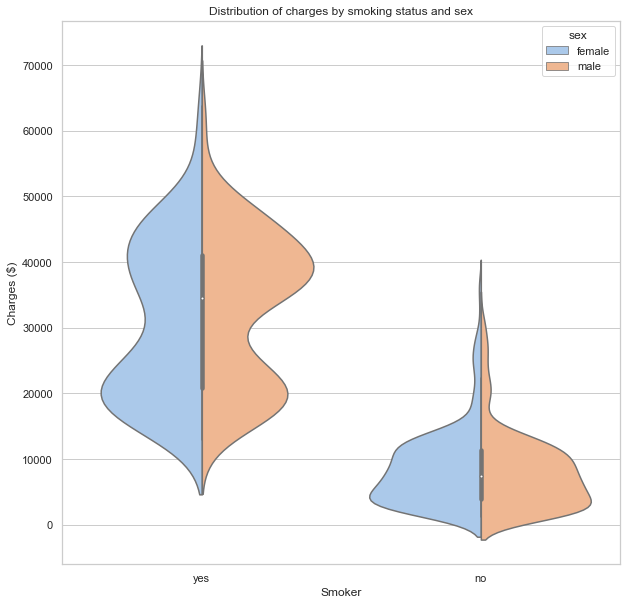

<Figure size 432x288 with 0 Axes>

In [94]:
sns.set_theme(style = 'whitegrid')
sns.set_palette("pastel")
plt.figure(figsize = (10, 10))
sns.violinplot(data = insurance, x = 'smoker', y = 'charges', hue = 'sex', split = True)
plt.xlabel("Smoker")
plt.ylabel("Charges ($)")
plt.title("Distribution of charges by smoking status and sex")
plt.show()
plt.savefig("smoker_sex_seaborn.png")

Very nice indeed, enjoyed that.